In [14]:
import numpy as np

class DSP:
    signal = [1.0,0.0]
    samples = 2
    fs = 1.0
    def __init__ (self,signal,samples,fs):
        if samples > 1:
            self.signal=signal
            self.samples = samples
            self.fs = fs
        else:
            raise RuntimeError("Sample size must be greater than 1")
    def integrate (self):
        output = np.full((self.samples,1),0.1);
        output[0] = self.signal[0]/(2*self.fs)
        for i in range (1, self.samples):
            output[i] = output[i-1] + (self.signal[i] + self.signal[i-1])/(2*self.fs)
        return output;
    def derivate (self):
        output = np.full((self.samples,1),0.1);
        output[0] = self.signal[0]*2/self.fs
        for i in range (1, self.samples):
            output[i] = (self.signal[i] - self.signal[i-1])*2/self.fs - output[i-1]
        return output;
    def integrate2 (self):
        output = np.full((self.samples,1),0.1);
        output[0] = self.signal[0] 
    

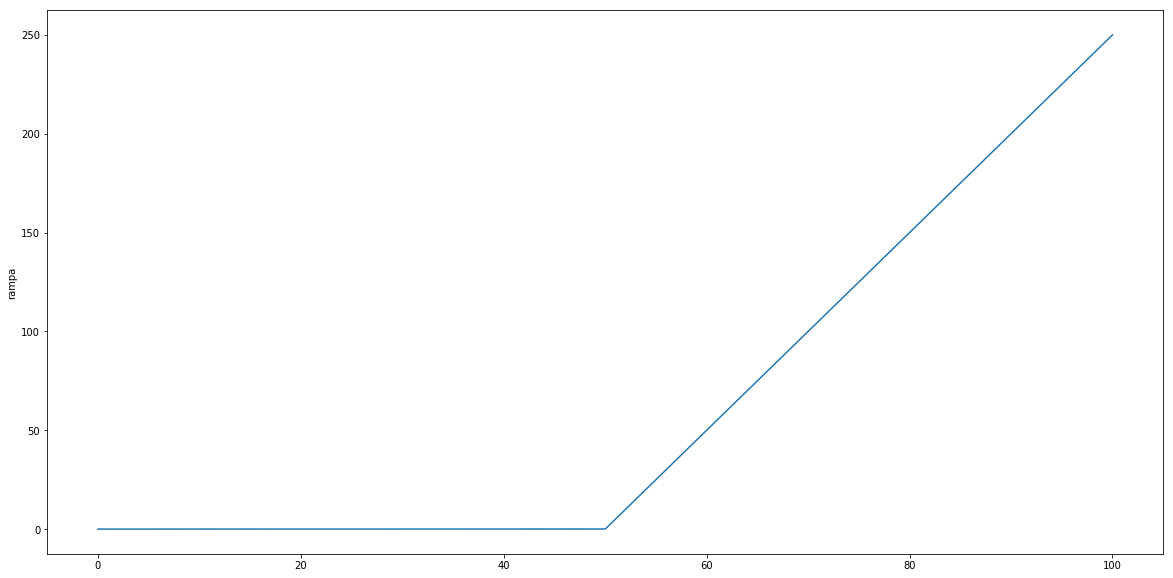

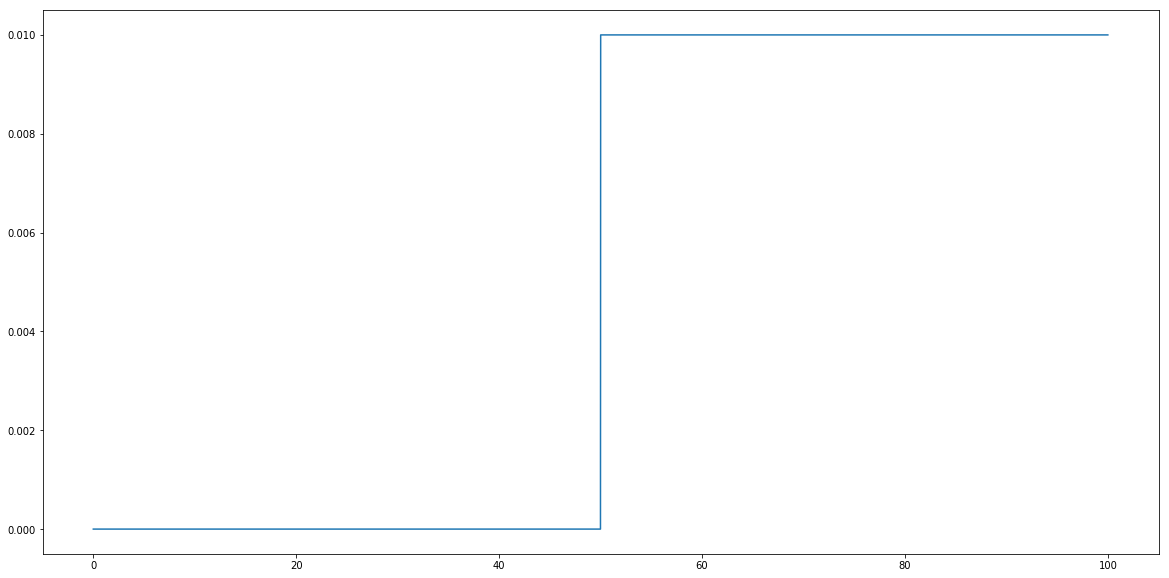

In [19]:
import numpy as np
import matplotlib.pyplot as plt

f = 10;
w = 2*np.pi*f;
time_interval = 100;
samples = 5000;

#t=np.linspace(0,time_interval,samples);
t=np.linspace(0,time_interval,samples)
step = np.heaviside(np.linspace(-samples/2,samples/2,samples), 0.5)
#dirac = np.zeros(samples)
#dirac[samples/2] = 1;

signal = DSP(step,samples,f);
rampa = signal.integrate();
#dirac = signal.derivate();
signal2 = DSP(rampa,samples,f)
dirac = signal2.derivate();
plt.rcParams['figure.figsize'] = (20,10)

fig1, ax = plt.subplots()
ax.plot(t,rampa);
plt.ylabel("rampa")
plt.show()

fig2, bx = plt.subplots()
bx.plot(t,dirac)
plt.show()